In [1]:
# Color constants
GRAY_1 = "#CCCCCC"
GRAY_2 = "#657072"
GRAY_3 = "#4A606C"
BLUE_1 = "#1f77b4"
BLUE_11 = "#0284c7"
GRAY_11 = "#d1d5db"
GRAY_12 = "#989898"
GRAY_13 = "#4A606C"

In [2]:
import os
import pandas as pd

def load_file_for_year(folder_path, year):
    """
    Loads the Excel file for the given year from the specified folder.
    Returns a pandas DataFrame or None if not found.
    """
    year_str = str(year)
    files = os.listdir(folder_path)
    matched_files = [
        f for f in files
        if year_str in f and 'resultat' in f.lower() and f.endswith('.xlsx')
    ]

    if not matched_files:
        print(f"No files found for year {year}")
        return None

    if len(matched_files) > 1:
        print(f"Warning: Multiple files matched for year {year}: {matched_files}")
        return None

    filename = matched_files[0]
    filepath = os.path.join(folder_path, filename)
    print(f"Loading data from: {filename}")
    df = pd.read_excel(filepath)
    return df

# Set your folder path here
folder = '../data/resultat_kurser'
selected_year = 2025  # change this as needed

df = load_file_for_year(folder, selected_year)

if df is not None:
    print(f"Data shape: {df.shape}")
    display(df.head())
else:
    print("No data found.")



Loading data from: resultat-2025-for-kurser-inom-yh.xlsx
Data shape: (1026, 15)


Diarienummer    Beslut                              Anordnare namn  \
0  MYH 2025/1001    Avslag  H√§rryda kommun, Yrkesh√∂gskolan i M√∂lnlycke   
1  MYH 2025/1002  Beviljad               TUC Sweden AB - Yrkesh√∂gskola   
2  MYH 2025/1003  Beviljad             IHM Business School AB G√∂teborg   
3  MYH 2025/1004  Beviljad                    Lexicon Yrkesh√∂gskola AB   
4  MYH 2025/1005  Beviljad                    Lexicon Yrkesh√∂gskola AB   

                                     Utbildningsnamn  \
0               Frihandel och ursprung - f√∂rdjupning   
1  IT- och informationss√§kerhet f√∂r administrativ...   
2      Digital redovisning & h√•llbarhetsrapportering   
3                     Digitalisera dina utbildningar   
4                    Producera digitala utbildningar   

                         Utbildningsomr√•de  \
0  Ekonomi, administration och f√∂rs√§ljning   
1                                  Data/IT   
2  Ekonomi, administration och f√∂rs√§ljning   
3               Pedagogik och undervisning   
4                 Kultur, media och design   

   Antal beviljade platser start 2025  Antal beviljade platser start 2026  \
0                                   0                                   0   
1                                  30                                  30   
2                                  40                                  40   
3                                  35                                  35   
4                                  35                                   0   

   Totalt antal beviljade platser  YH-po√§ng                     Kommun  \
0                               0        30                    H√§rryda   
1                              60        30  Se "Lista flera kommuner"   
2                              80        30                   G√∂teborg   
3                              70        50                  Stockholm   
4                              35        50                  Stockholm   

                         L√§n                  FA-region  Antal kommuner  \
0            V√§stra G√∂taland                   G√∂teborg               1   
1  Se "Lista flera kommuner"  Se "Lista flera kommuner"               5   
2            V√§stra G√∂taland                   G√∂teborg               1   
3                  Stockholm                  Stockholm               1   
4                  Stockholm                  Stockholm               1   

   Antal l√§n  Antal FA-regioner  
0          1                  1  
1          5                  5  
2          1                  1  
3          1                  1  
4          1                  1

# Matplotlib:
### Find for a selected county:  
- overall number of courses that different schools applied for
- courses that were approved ("Beviljade")
- courses that were rejected ("Avslag")
- sorted by the percentage of approved courses
---------------------

- Placera nischomr√•dena med h√∂g godk√§nnandegrad i fokus
- Det √§r l√§ttare att uppt√§cka m√∂nster som "sm√• men lovande" omr√•den
- Kontrasten blir omedelbart synlig n√§r ett omr√•de med h√∂g godk√§nnandegrad har l√§gre totalt antal kurser

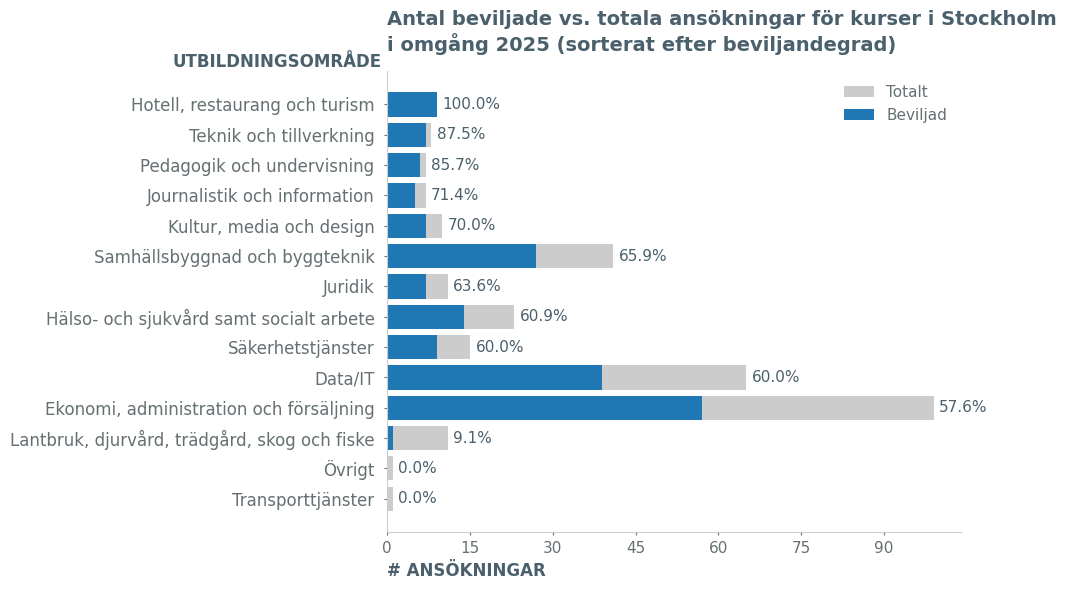

In [3]:
def plot_education_area_bar(df, county, gray_1=GRAY_1, blue_1=BLUE_1, gray_2=GRAY_2, gray_3=GRAY_3):
    """
    Plots a horizontal bar chart showing total and approved courses per education area for a given county.
    Sorted by approval rate.
    """
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MaxNLocator

    # Filter data for the selected county
    df_county = df[df["L√§n"] == county]

    # Count total and approved courses per education area
    total_courses = df_county.groupby("Utbildningsomr√•de").size()
    approved_courses = df_county[df_county["Beslut"] == "Beviljad"].groupby("Utbildningsomr√•de").size()

    # Combine into one DataFrame, fill missing with 0
    summary = pd.DataFrame({
        "Total": total_courses,
        "Approved": approved_courses
    }).fillna(0)

    # Calculate approval rate as percentage
    summary["Approval Rate %"] = (summary["Approved"] / summary["Total"] * 100).round(1)
    
    # Sortera efter godk√§nnandegrad ist√§llet f√∂r totalt antal
    summary = summary.sort_values("Approval Rate %")  # √Ñndrad fr√•n "Total" till "Approval Rate %"

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    y_pos = range(len(summary))

    # Plot total courses as lighter bars
    ax.barh(y_pos, summary["Total"], color=gray_1, label="Totalt")

    # Plot approved courses as darker bars on top
    ax.barh(y_pos, summary["Approved"], color=blue_1, edgecolor=None, label="Beviljad")

    # Legend settings
    legend = ax.legend(frameon=False, facecolor='white', fontsize=11)
    for text in legend.get_texts():
        text.set_color(gray_2)

    # Remove clutter
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['bottom', 'left']].set_color(gray_1)
    ax.tick_params(axis="both", colors=gray_2, labelsize=11, length=2, pad=5)
    ax.tick_params(axis="y", pad=7)

    # Axis labels and title
    ax.set_yticks(y_pos)
    ax.set_yticklabels(summary.index, color=gray_2, fontsize=12)
    ax.set_ylabel("UTBILDNINGSOMR√ÖDE", loc="top",
                  fontdict=dict(color=gray_3, weight="bold", size=12), rotation=0)
    ax.yaxis.set_label_coords(-0.01, 1)
    ax.set_xlabel("# ANS√ñKNINGAR", loc="left",
                  fontdict=dict(color=gray_3, weight="bold", size=12))
    ax.set_title(
        f"Antal beviljade vs. totala ans√∂kningar f√∂r kurser i {county} \ni omg√•ng 2025 (sorterat efter beviljandegrad)",
        loc="left", pad=15,
        fontdict=dict(color=gray_3, weight="bold", size=14)
    )
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Add approval rate text labels to the right of total bars
    for i, rate in enumerate(summary["Approval Rate %"]):
        ax.text(summary["Total"].iloc[i] + max(summary["Total"])*0.01,
                i,
                f"{rate}%",
                va='center',
                color=gray_3,
                fontsize=11)
        

    plt.tight_layout()
    plt.show()

# Example usage:
plot_education_area_bar(df, county="Stockholm")

# Matplotlib:
### Find for a selected year:  
- overall number of students per education area
- number of females
- number of males
- sorted by the percentage of females
---------------------



NOTE: I yrkesh√∂gskolan (YH) i Sverige finns det en uttalad str√§van mot j√§mnare k√∂nsf√∂rdelning ‚Äì s√§rskilt inom utbildningar som √§r starkt k√∂nssegregerade.

üîπ Vad det inneb√§r:

Myndigheten f√∂r yrkesh√∂gskolan (MYH) arbetar aktivt med att uppmuntra b√•de utbildningsanordnare och arbetsliv att rekrytera fler fr√•n det underrepresenterade k√∂net.

Det kan handla om att lyfta f√∂rebilder, anpassa marknadsf√∂ring och visa p√• karri√§rm√∂jligheter.

üîπ Exempel p√• starkt kvinnodominerade utbildningsomr√•den inom YH:

V√•rd och omsorg (t.ex. specialistundersk√∂terska, tandsk√∂terska, st√∂dpedagog)

F√∂rskola och skola (t.ex. utbildningar mot l√§rar- eller pedagogiskt st√∂d)

Administration och ekonomi (m√•nga utbildningar inom l√∂ne- och ekonomikonsultation domineras av kvinnor)

üîπ √Ötg√§rder f√∂r j√§mnare k√∂nsf√∂rdelning:

Vissa utbildningar kan erbjuda "s√§rskilda platser" f√∂r underrepresenterat k√∂n.

Utbildningsanordnare f√•r st√∂d av MYH f√∂r riktad marknadsf√∂ring.

Arbetslivet involveras i att visa att b√•de m√§n och kvinnor beh√∂vs i dessa yrken.

In [4]:
import pandas as pd

# Load data
file_path = "../data/scb/Antagna som p√•b√∂rjat studier p√• yrkesh√∂gskolans kurser.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Clean column name for easier access
df.columns = df.columns.str.strip()

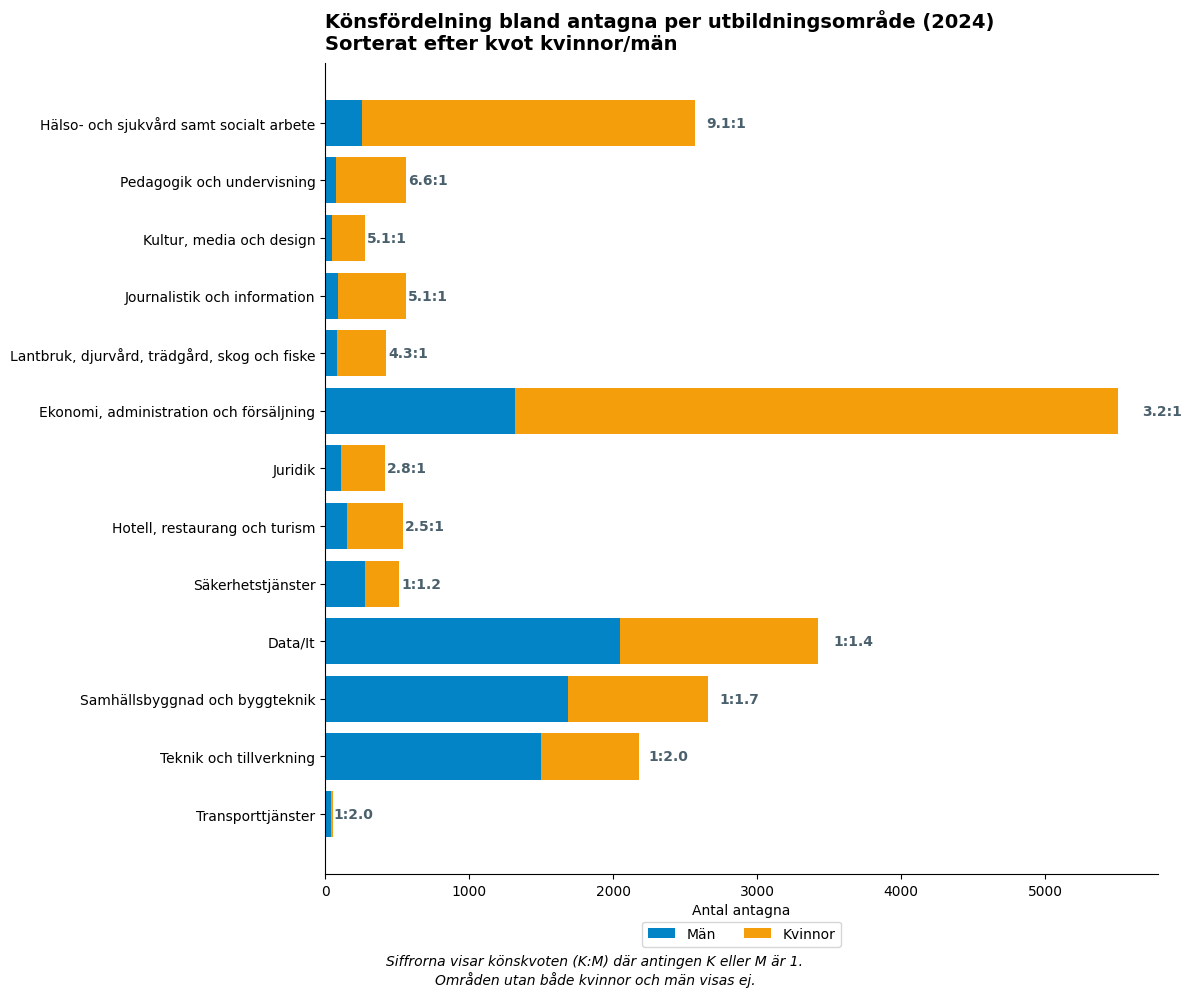

(<Figure size 1200x1000 with 1 Axes>,
 <Axes: title={'left': 'K√∂nsf√∂rdelning bland antagna per utbildningsomr√•de (2024)\nSorterat efter kvot kvinnor/m√§n'}, xlabel='Antal antagna'>)

In [10]:
def plot_stacked_bar_antagna_matplotlib(df: pd.DataFrame, year: int = None) -> None:
    """
    Plots a horizontal stacked bar chart showing gender distribution of admitted students by education area.
    Uses matplotlib with sorting by female/male ratio in simplified format.
    
    Parameters:
        df: DataFrame with columns: k√∂n, utbildningsomr√•de, √•lder, [2020-2024]
        year: Year to plot data for (int or str). If None, uses latest available year
    
    Returns:
        None - displays a matplotlib figure
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Input validation
    if df.empty:
        raise ValueError("DataFrame is empty")
    
    # Rename columns for consistency
    df.columns = ["k√∂n", "utbildningsomr√•de", "√•lder", "2020", "2021", "2022", "2023", "2024"]
    df = df.fillna(0)

    # Ensure year columns are int
    year_columns = ["2020", "2021", "2022", "2023", "2024"]
    for col in year_columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0).astype(int)

    # Melt to long format
    df_long = df.melt(
        id_vars=["k√∂n", "utbildningsomr√•de", "√•lder"],
        var_name="√•r",
        value_name="antal"
    )
    df_long["antal"] = pd.to_numeric(df_long["antal"], errors="coerce").fillna(0).astype(int)

    # Filter data
    df_filtered = df_long[
        (df_long["√•lder"].str.lower() == "totalt") & 
        (df_long["utbildningsomr√•de"].str.lower() != "totalt")
    ]

    # Select year
    if year is None:
        year = df_filtered["√•r"].max()
    year = str(year)
    
    if year not in year_columns:
        raise ValueError(f"Year must be one of {year_columns}")
        
    current_data = df_filtered[df_filtered["√•r"] == year]

    # Create pivot table
    pivot_df = current_data.pivot_table(
        index="utbildningsomr√•de",
        columns="k√∂n",
        values="antal",
        aggfunc="sum"
    ).fillna(0).reset_index()

    # Format column names
    pivot_df.columns.name = None
    pivot_df.rename(columns={
        "kvinnor": "Kvinnor",
        "m√§n": "M√§n",
        "totalt": "Totalt"
    }, inplace=True)

    # Ensure numbers are int
    for col in ["Kvinnor", "M√§n", "Totalt"]:
        if col in pivot_df.columns:
            pivot_df[col] = pd.to_numeric(pivot_df[col], errors="coerce").fillna(0).astype(int)
    
    # Calculate kvinnor/m√§n ratio, handle division by zero
    pivot_df["K_M_Ratio"] = pivot_df.apply(
        lambda row: round(row["Kvinnor"] / row["M√§n"], 1) if row["M√§n"] > 0 else float('inf'), 
        axis=1
    )
    
    # Filter out rows where either Kvinnor or M√§n is 0
    pivot_df = pivot_df[(pivot_df["Kvinnor"] > 0) & (pivot_df["M√§n"] > 0)]
    
    # Sort by kvinnor/m√§n ratio
    pivot_df = pivot_df.sort_values("K_M_Ratio", ascending=True)
    
    # If no data after filtering
    if pivot_df.empty:
        print("No data available after filtering zero values")
        return None, None
    
    # Define colors (matching the Plotly version)
    color_women = "#f59e0b"  # Orange for women
    color_men = "#0284c7"    # Blue for men
    color_ratio = GRAY_3     # Gray for ratio
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot data
    y_pos = np.arange(len(pivot_df["utbildningsomr√•de"]))
    width = 0.8
    
    # Plot stacked bars
    ax.barh(y_pos, pivot_df["M√§n"], height=width, color=color_men, label="M√§n")
    ax.barh(y_pos, pivot_df["Kvinnor"], height=width, color=color_women, left=pivot_df["M√§n"], label="Kvinnor")
    
    # Add ratio annotations
    for i, (total, ratio) in enumerate(zip(
        pivot_df["Totalt"], pivot_df["K_M_Ratio"]
    )):
        # Format ratio text as "K:M" where either K or M is 1
        if ratio >= 1:
            ratio_text = f"{ratio:.1f}:1"
        else:
            ratio_text = f"1:{round(1/ratio, 1)}"
            
        # Add ratio text with gray color
        ax.text(
            total + (total * 0.03),  # Position after the bar
            i,
            ratio_text,
            va='center',
            ha='left',
            color=color_ratio,
            fontweight='bold',
            fontsize=10
        )
    
    # Customize plot
    ax.set_yticks(y_pos)
    ax.set_yticklabels(pivot_df["utbildningsomr√•de"])
    ax.set_xlabel("Antal antagna")
    ax.set_title(f"K√∂nsf√∂rdelning bland antagna per utbildningsomr√•de ({year})\nSorterat efter kvot kvinnor/m√§n", 
                 fontweight='bold', fontsize=14, loc='left', pad=10)
    
    # Add legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add explanation text
    plt.figtext(
        0.5, 0.01, 
        "Siffrorna visar k√∂nskvoten (K:M) d√§r antingen K eller M √§r 1.\nOmr√•den utan b√•de kvinnor och m√§n visas ej.", 
        ha='center', fontsize=10, style='italic'
    )
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)
    
    # Show plot
    plt.show()
    
    return fig, ax

# Example usage:
plot_stacked_bar_antagna_matplotlib(df, year='2024')